# **Análise Quanti - Ativos Bancários** by Roberto Pivetta
Trading com Dados - https://www.tradingcomdados.com.br/dados 
    Python Mercado Financeiro

In [1]:
!pip install pandas_datareader -U

In [2]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#Seleção de ativos do setor Bancário para análise quanti
ativos = ['BBAS3.SA','ITUB4.SA','BBDC4.SA','SANB11.SA']

In [4]:
#criado carteira vazia
analise = pd.DataFrame()

In [5]:
#armazena todas as cotações dos ativos no df da carteira
for t in ativos:
    analise[t] = wb.DataReader(t, data_source='yahoo',start='2018-01-01')['Adj Close']

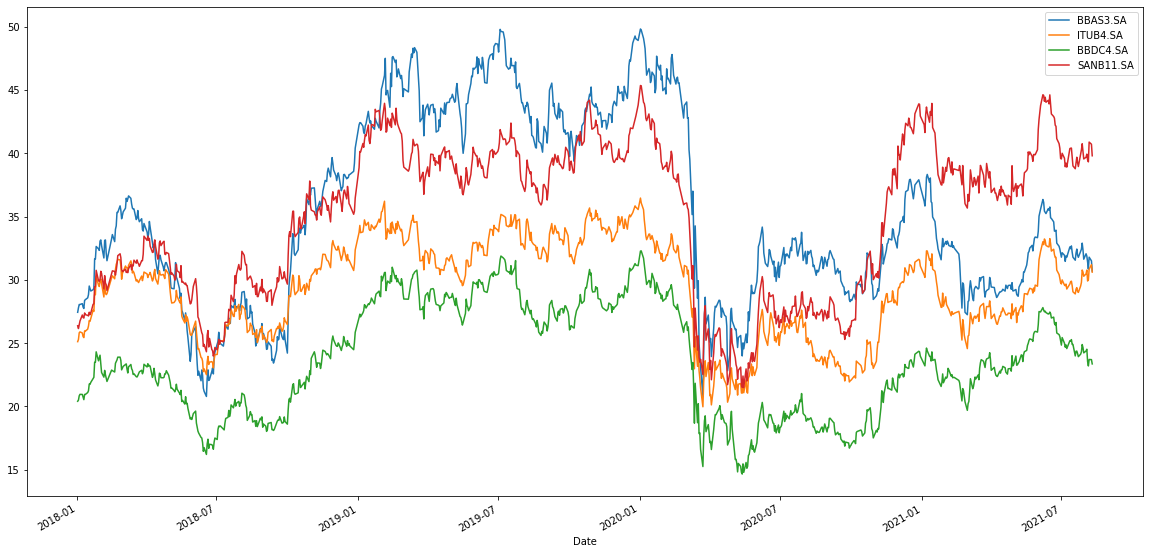

In [6]:
analise.plot(figsize=(20,10));

In [7]:
analise=analise.rename({"BBAS3.SA":"Banco do Brasil","ITUB4.SA":"ITAU","BBDC4.SA":"Bradesco","SANB11.SA":"Santander"},axis=1)

In [8]:
analise.head()

,Banco do Brasil,ITAU,Bradesco,Santander
Date,,,,
2018-01-02,27.436188,25.117924,20.408943,26.372084
2018-01-03,27.786121,25.289658,20.501740,26.154526
2018-01-04,28.052736,25.816282,20.838120,26.468769
2018-01-05,28.052736,25.890705,20.956150,26.750784
2018-01-08,28.119390,25.804829,20.950258,27.222982


In [9]:
# Retorno dos Preços
analise_retornos = analise.pct_change()
analise_retornos

,Banco do Brasil,ITAU,Bradesco,Santander
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.012754,0.006837,0.004547,-0.008250
2018-01-04,0.009595,0.020824,0.016407,0.012015
2018-01-05,0.000000,0.002883,0.005664,0.010655
2018-01-08,0.002376,-0.003317,-0.000281,0.017652
...,...,...,...,...
2021-08-04,-0.014743,-0.027949,-0.039560,-0.011261
2021-08-05,-0.017829,0.003009,-0.014862,-0.004015
2021-08-06,0.030470,0.028000,0.021983,0.039675


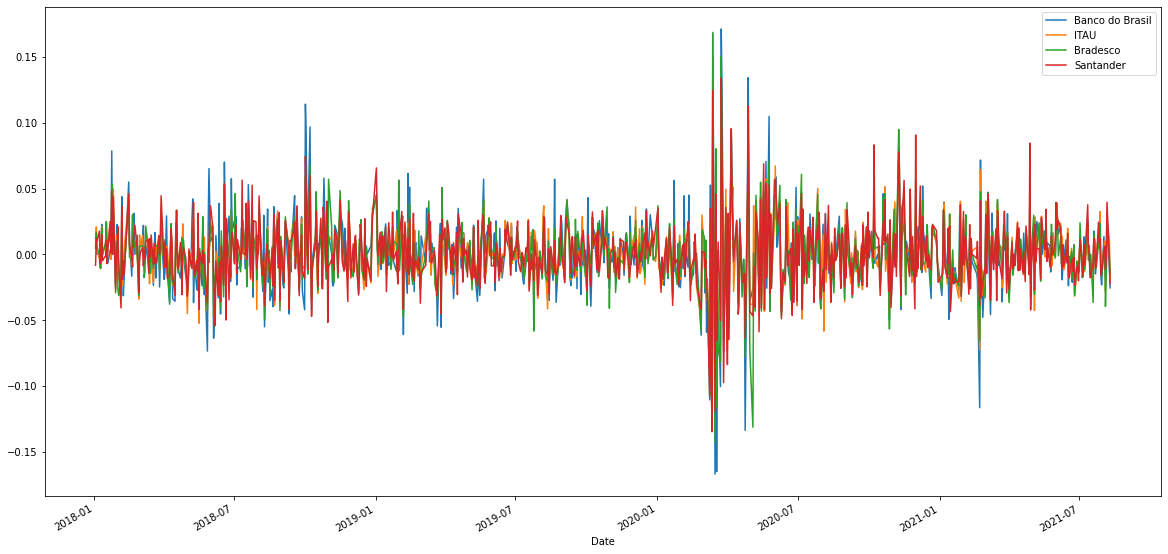

In [10]:
analise_retornos.plot(figsize=(20,10));

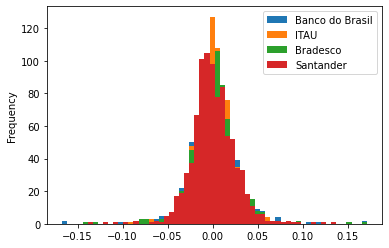

In [11]:
#Histograma dos retornos
analise_retornos.plot.hist(bins=60);

In [12]:
#Volatilidade diária
analise_retornos.std()

Banco do Brasil    0.028018
ITAU               0.022057
Bradesco           0.025197
Santander          0.024950
dtype: float64

In [13]:
analise_retornos.describe()

,Banco do Brasil,ITAU,Bradesco,Santander
count,887.000000,887.000000,887.000000,887.000000
mean,0.000520,0.000466,0.000470,0.000774
std,0.028018,0.022057,0.025197,0.024950
min,-0.166895,-0.098204,-0.142744,-0.134740
25%,-0.013134,-0.012496,-0.013029,-0.012869
50%,0.000099,-0.000281,0.000000,-0.000763
75%,0.013905,0.012936,0.012628,0.013783
max,0.171261,0.110593,0.168669,0.134101


In [14]:
#Downside Risk 
downside_risk_analise = np.std(analise_retornos<0)

In [15]:
downside_risk_analise

Banco do Brasil    0.499817
ITAU               0.499999
Bradesco           0.499919
Santander          0.499873
dtype: float64

In [16]:
upside_risk_analise = np.std(analise_retornos>0)

In [17]:
upside_risk_analise

Banco do Brasil    0.500000
ITAU               0.499873
Bradesco           0.499980
Santander          0.499633
dtype: float64

In [18]:
#Janela Volatilidade
rolling_vol_analise = analise_retornos.rolling(window=252).std()

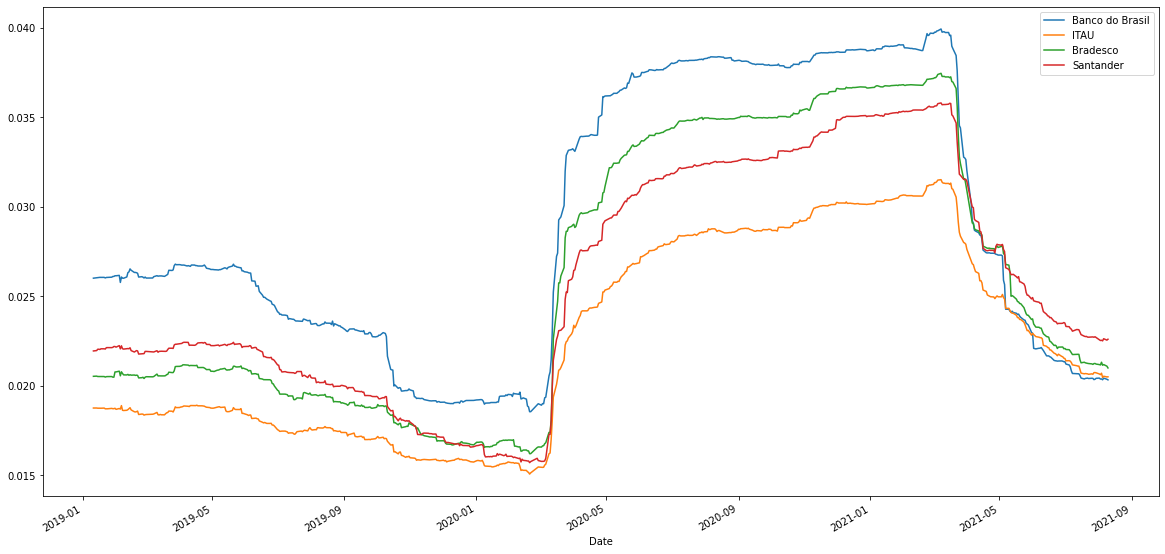

In [19]:
rolling_vol_analise.plot(figsize=(20,10));

In [20]:
#Limpando os NANs
analise_retornos_ajustada = analise_retornos.dropna()

In [21]:
#Skewness Viés da distribuição (Ações com inclinação positiva)
from scipy.stats import skew
skew_analise = skew(analise_retornos_ajustada)
skew_analise

array([0.08653018, 0.09950336, 0.11058205, 0.19493735])

In [22]:
#Curtose Achatamento da curva da função de distribuição normal (calcula o excesso)  (normal - curtose =3)
from scipy.stats import kurtosis
curtose_analise = kurtosis(analise_retornos_ajustada)
curtose_analise

array([8.18503729, 2.40169352, 7.09343733, 4.24772568])

In [23]:
#Teste de Normalidade Shapiro-Wilk
from scipy.stats import shapiro

In [24]:
#h=0 hipótese nula rejeitada (condicional p valor)
shapiro_analise = shapiro(analise_retornos_ajustada)
if shapiro_analise[1] <= 0.05:
    print("Hipótese nula rejeitada")
else:
    print("Hipótese nula aceita") #amostra de distribuição normal

Hipótese nula rejeitada


In [25]:
shapiro_analise[1]

2.1325489160395195e-37

In [26]:
#VAR Histórico
val_90= np.percentile(analise_retornos_ajustada,10)
val_95=np.percentile(analise_retornos_ajustada,5)
val_99=np.percentile(analise_retornos_ajustada,1)
print(val_90,val_95,val_99)

-0.025512336322843488 -0.035400464624299216 -0.0653040618789341


In [27]:
#Var Paramétrico (mais utilizado para ajustes)
media_retorno_analise = np.mean(analise_retornos_ajustada)
desvio_retorno_analise = np.std(analise_retornos_ajustada)

In [28]:
from scipy.stats import norm

In [29]:
#distribuição em cima da média e variância  (mensurar risco de perda pontecial dentro de uma distribuição normal)
var_n_90= norm.ppf(1-0.9,media_retorno_analise,desvio_retorno_analise)
print(var_n_90)

[-0.03536717 -0.02778611 -0.03180284 -0.03118217]


In [30]:
var_n_95= norm.ppf(1-0.95,media_retorno_analise,desvio_retorno_analise)
print(var_n_95)

[-0.04554057 -0.03579513 -0.04095162 -0.04024141]


In [31]:
var_n_99= norm.ppf(1-0.99,media_retorno_analise,desvio_retorno_analise)
print(var_n_99)

[-0.06462419 -0.05081871 -0.05811321 -0.05723505]
